## Black-box exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
## load dataset
background_df = pd.read_pickle("../dataFrames/df_events_LHCO2020_backgroundMC_Pythia.pkl")
blackbox_df = pd.read_pickle("../dataFrames/df_events_LHCO2020_BlackBox1.pkl")

background_data_array = background_df.to_numpy()[:,3:].astype(float)
blackbox_data_array = blackbox_df.to_numpy()[:,3:].astype(float)

In [11]:
background_df.describe()

,evtIdx,isSignal,jet_0_tau_1,jet_0_tau_2,jet_0_tau_3,jet_0_tau_r21,jet_0_tau_r32,jet_1_tau_1,jet_1_tau_2,jet_1_tau_3,...,jet_1_const_0_phi,jet_1_const_0_pt,jet_1_const_1_constidx,jet_1_const_1_eta,jet_1_const_1_phi,jet_1_const_1_pt,jet_1_const_2_constidx,jet_1_const_2_eta,jet_1_const_2_phi,jet_1_const_2_pt
count,999999.000000,999999.0,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,...,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000
mean,499999.000000,0.0,0.011837,0.008694,0.008013,2.387716,2.527833,0.011759,0.009144,0.008713,...,-0.002971,332.281709,46.687106,-0.000423,-0.003114,167.615580,45.731883,-0.000335,-0.003255,109.212411
std,288674.990257,0.0,0.025226,0.020865,0.017631,17.299108,21.467150,0.032806,0.023403,0.022639,...,1.812983,207.338369,26.781845,0.803519,1.812985,87.005349,26.429214,0.802935,1.812806,50.708466
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.141580,17.873350,0.000000,-2.892982,-3.141578,0.000000,0.000000,-2.827789,-3.141562,0.000000
25%,249999.500000,0.0,0.003123,0.002609,0.002590,0.300470,0.455325,0.003222,0.002841,0.002877,...,-1.574334,179.414330,26.000000,-0.591396,-1.574274,104.875805,25.000000,-0.589789,-1.574071,73.003983
50%,499999.000000,0.0,0.006598,0.004997,0.004834,0.869923,1.000000,0.006501,0.005393,0.005355,...,-0.006226,280.998688,42.000000,-0.000182,-0.006144,149.044846,41.000000,-0.000014,-0.006752,100.091064
75%,749998.500000,0.0,0.014387,0.009656,0.009000,1.809820,2.012533,0.013425,0.010150,0.009839,...,1.566095,432.623993,62.000000,0.589738,1.565338,210.834221,61.000000,0.589235,1.565235,135.757576
max,999998.000000,0.0,5.960637,5.960637,5.537206,7330.246573,9752.717803,6.049531,6.144328,5.536451,...,3.141584,3138.889893,262.000000,2.862678,3.141586,1418.920166,239.000000,3.075717,3.141582,803.247253


In [36]:
blackbox_df.describe()

,evtIdx,isSignal,jet_0_tau_1,jet_0_tau_2,jet_0_tau_3,jet_0_tau_r21,jet_0_tau_r32,jet_1_tau_1,jet_1_tau_2,jet_1_tau_3,...,jet_1_const_0_phi,jet_1_const_0_pt,jet_1_const_1_constidx,jet_1_const_1_eta,jet_1_const_1_phi,jet_1_const_1_pt,jet_1_const_2_constidx,jet_1_const_2_eta,jet_1_const_2_phi,jet_1_const_2_pt
count,999999.000000,999999.0,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,...,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000
mean,499999.000000,0.0,0.012130,0.008784,0.007986,2.496328,2.689362,0.012478,0.009563,0.009022,...,0.001732,352.584944,42.152459,-0.000095,0.002607,172.130874,41.236659,-0.000262,0.001974,109.761740
std,288674.990257,0.0,0.029040,0.022206,0.021723,44.426082,32.203297,0.036290,0.031878,0.027302,...,1.814509,221.459319,24.853474,0.801470,1.814134,91.833627,24.550595,0.800964,1.814223,52.990333
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.141593,20.321569,0.000000,-2.991166,-3.141584,0.000000,0.000000,-3.263251,-3.141589,0.000000
25%,249999.500000,0.0,0.002989,0.002441,0.002400,0.282549,0.431399,0.003192,0.002777,0.002788,...,-1.569745,190.983414,23.000000,-0.582413,-1.568188,107.076359,22.000000,-0.582171,-1.569305,72.538658
50%,499999.000000,0.0,0.006584,0.004836,0.004577,0.861612,1.000000,0.006614,0.005368,0.005293,...,0.001282,297.451355,37.000000,-0.000103,0.001433,151.967194,36.000000,0.000000,0.000000,100.143097
75%,749998.500000,0.0,0.014813,0.009656,0.008779,1.850778,2.032805,0.014085,0.010313,0.009893,...,1.573966,457.420349,56.000000,0.582099,1.574353,215.580826,55.000000,0.581346,1.574017,136.490982
max,999998.000000,0.0,5.993892,5.772088,5.919134,38616.197411,16100.068369,6.016278,6.058575,5.857625,...,3.141587,3051.232666,232.000000,2.924499,3.141577,1453.972778,252.000000,2.997483,3.141590,940.051208


In [18]:
tau_names = background_df.columns[subjettiness_start:subjettiness_end]

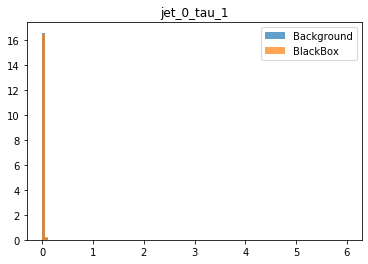

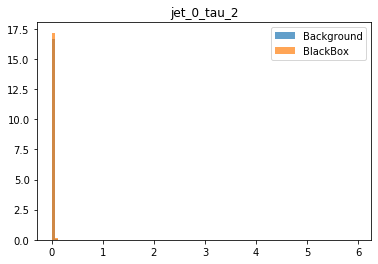

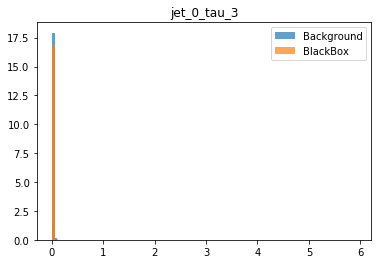

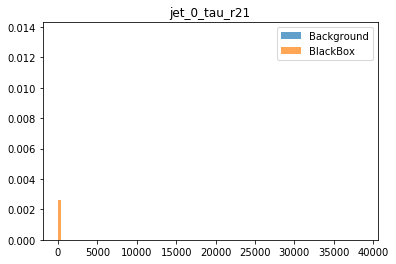

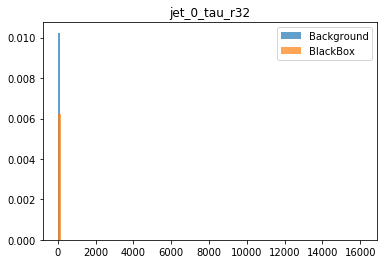

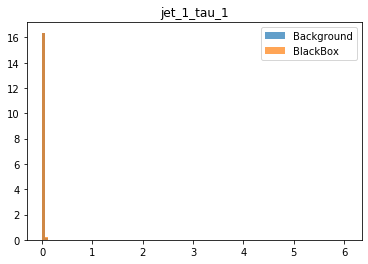

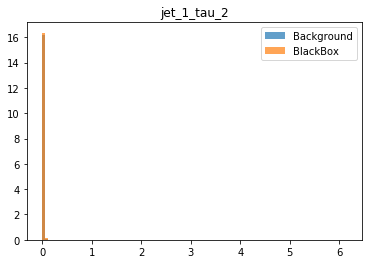

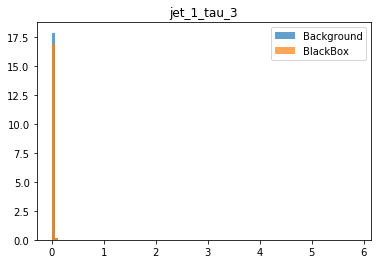

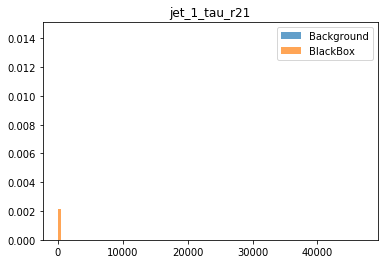

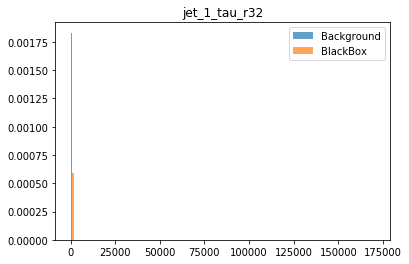

In [16]:
# Indices of the subjettiness variables; first 5 are jet 0, second 5 are jet 1
subjettiness_start = 3
subjettiness_end = 13

for param in range(subjettiness_end - subjettiness_start):
    plt.hist(background_data_array[:, param], alpha=0.7, label='Background', density=True, bins=100)
    plt.hist(blackbox_data_array[:, param], alpha=0.7, label='BlackBox', density=True, bins=100)
    plt.title(f"{background_df.columns[param+subjettiness_start]}")
    plt.legend(loc='upper right')
    plt.show()
    print()

Let's try and find the outliers. For each $\tau$ parameter, how many outliers do we have?

In [50]:
z_threshold = 10

# Grab only the things that are more than some number of standard deviations from the mean
for tau in tau_names:
    bg_mean = background_df[tau].mean()
    bb_mean = blackbox_df[tau].mean()
    
    background_df_sub = background_df[background_df[tau] > z_threshold * bg_mean]
    blackbox_df_sub = blackbox_df[blackbox_df[tau] > z_threshold * bb_mean]
    
    print(f"Parameter {tau}:")
    print(f"Background outliers: \t{len(background_df_sub)}")
    print(f"Blackbox outliers: \t{len(blackbox_df_sub)}")
    print()

Parameter jet_0_tau_1:
Background outliers: 	1117
Blackbox outliers: 	1151

Parameter jet_0_tau_2:
Background outliers: 	1037
Blackbox outliers: 	1240

Parameter jet_0_tau_3:
Background outliers: 	1519
Blackbox outliers: 	1962

Parameter jet_0_tau_r21:
Background outliers: 	10571
Blackbox outliers: 	10116

Parameter jet_0_tau_r32:
Background outliers: 	9318
Blackbox outliers: 	9503

Parameter jet_1_tau_1:
Background outliers: 	1718
Blackbox outliers: 	2112

Parameter jet_1_tau_2:
Background outliers: 	1436
Blackbox outliers: 	1775

Parameter jet_1_tau_3:
Background outliers: 	1682
Blackbox outliers: 	2239

Parameter jet_1_tau_r21:
Background outliers: 	9606
Blackbox outliers: 	8985

Parameter jet_1_tau_r32:
Background outliers: 	8244
Blackbox outliers: 	7232



Let's also see what things look like in the extremal regions

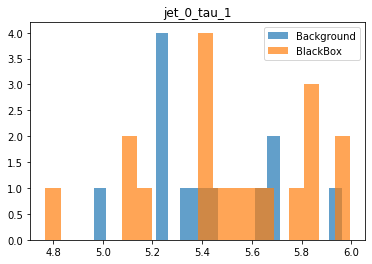

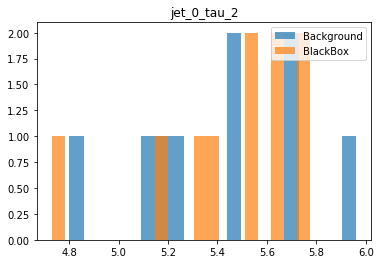

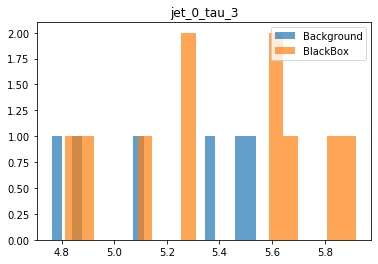

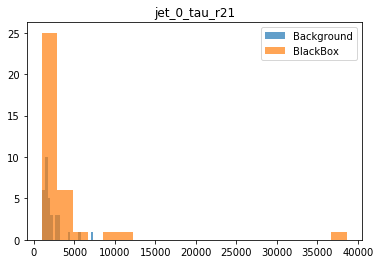

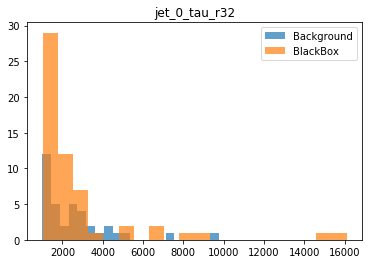

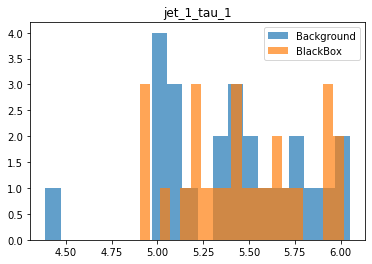

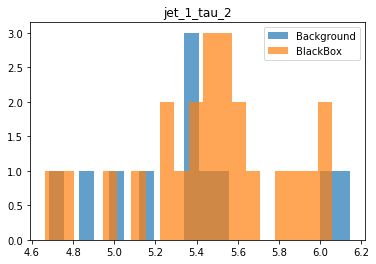

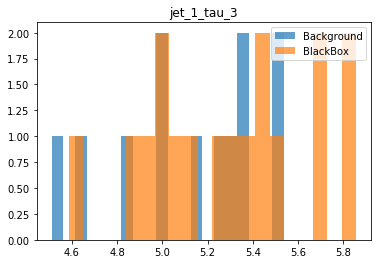

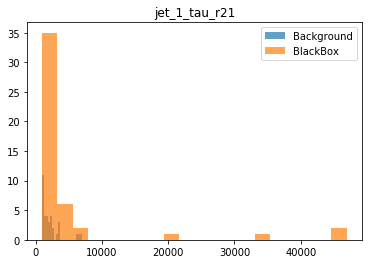

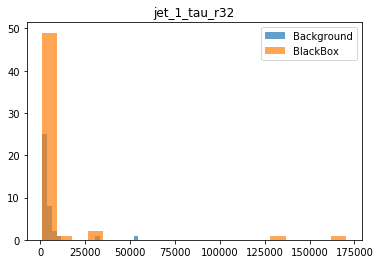

In [51]:
for tau in tau_names:
    threshold = 3
    if 'r' in tau:
        threshold = 1000
    bg_data = background_df[background_df[tau] > threshold][tau].to_numpy()
    bb_data = blackbox_df[blackbox_df[tau] > threshold][tau].to_numpy()
    plt.hist(bg_data, alpha=0.7, label='Background', density=False, bins=20)
    plt.hist(bb_data, alpha=0.7, label='BlackBox', density=False, bins=20)
    plt.title(f"{tau}")
    plt.legend(loc='upper right')
    plt.show()
    print()

Now let's sort the dataframes by these parameters... are the outliers for r32 in the blackbox the same as r31?

In [65]:
jet1r32_indices = blackbox_df.sort_values(by=['jet_1_tau_r32'], ascending=False)[:5]['evtIdx'].to_numpy()
jet1r21_indices = blackbox_df.sort_values(by=['jet_1_tau_r21'], ascending=False)[:5]['evtIdx'].to_numpy()

Let's make histograms again, but mark where these values fall for each special parameter.

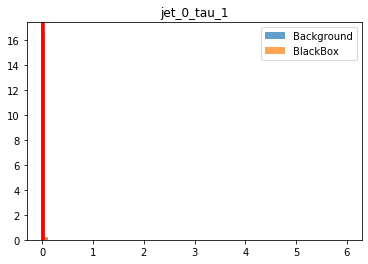

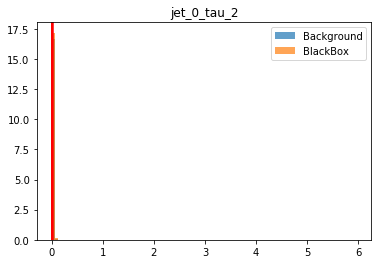

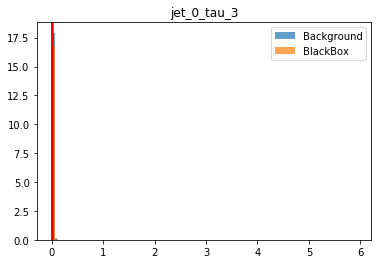

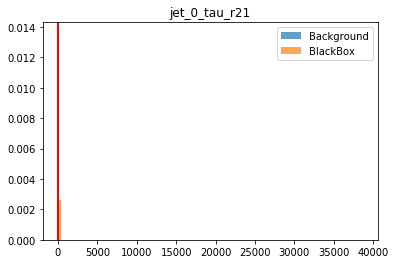

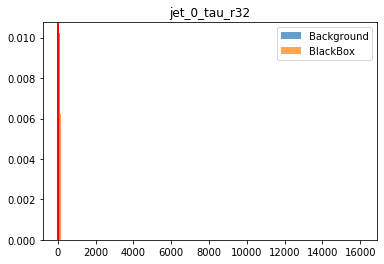

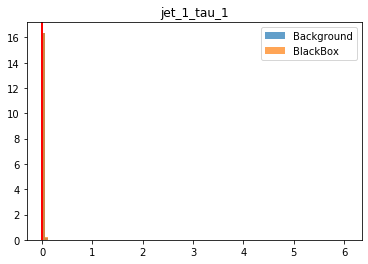

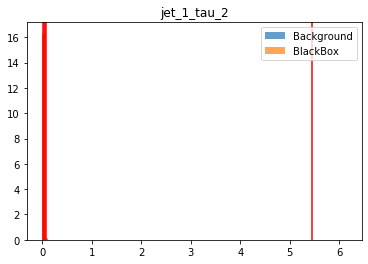

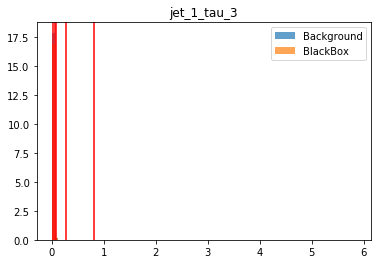

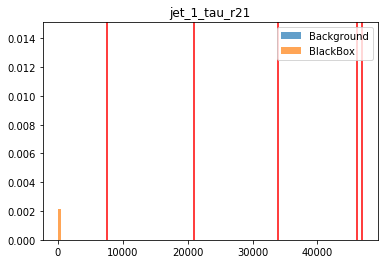

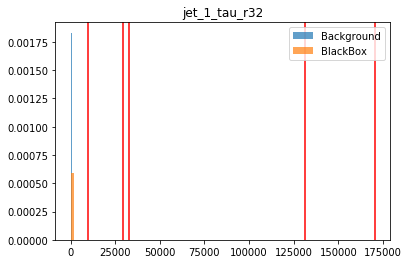

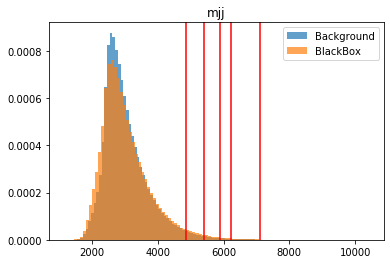

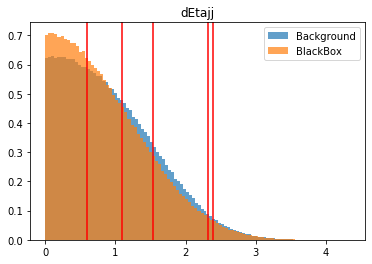

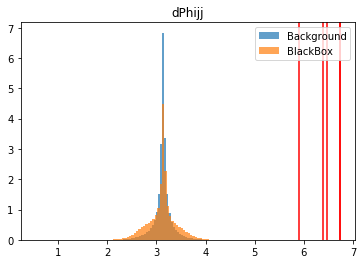

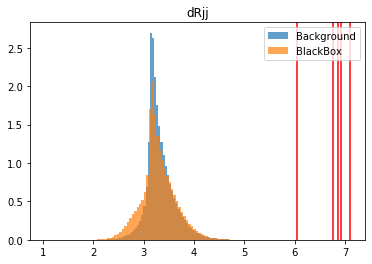

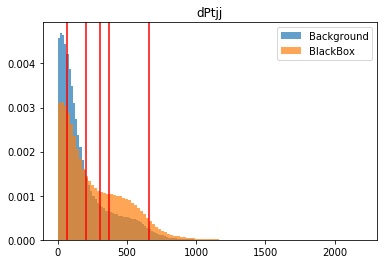

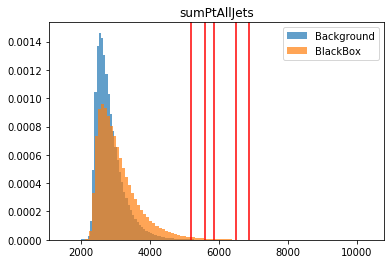

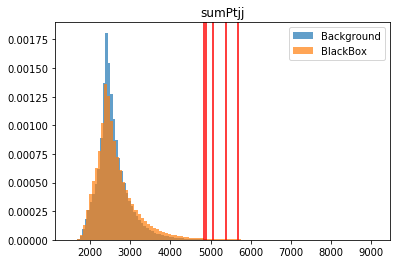

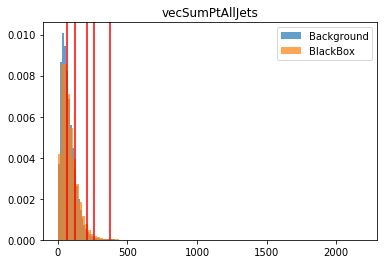

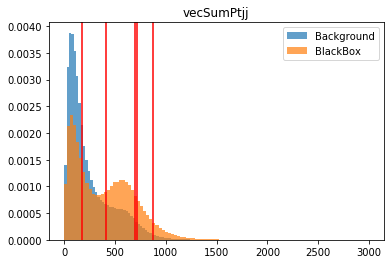

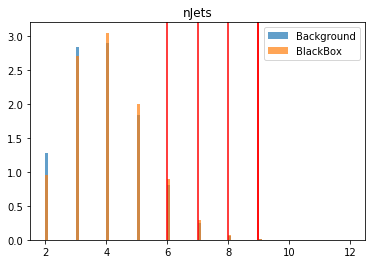

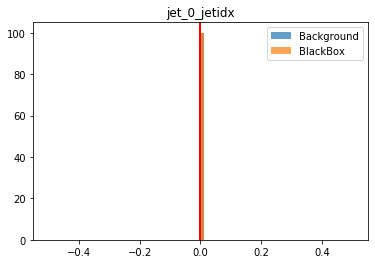

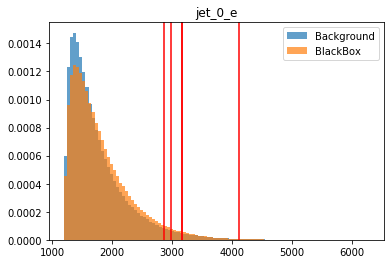

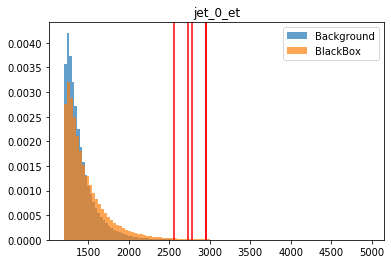

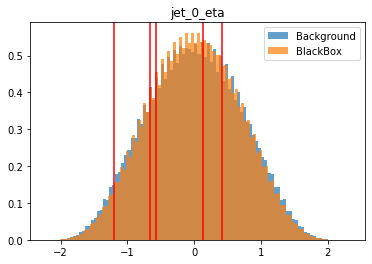

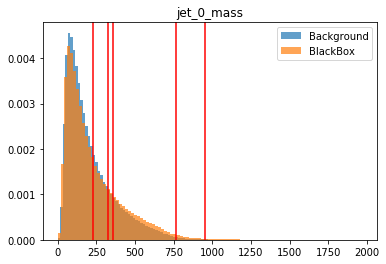

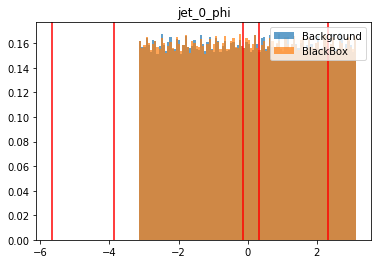

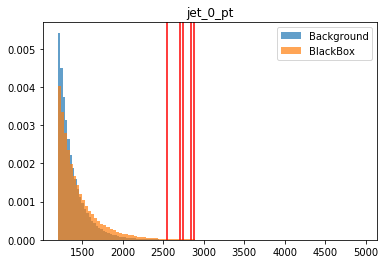

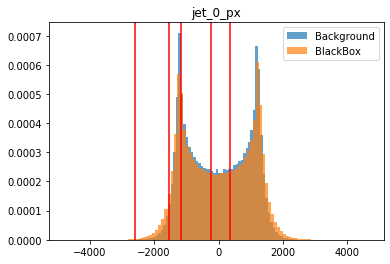

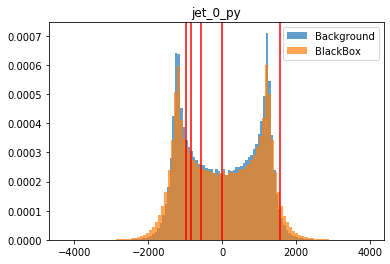

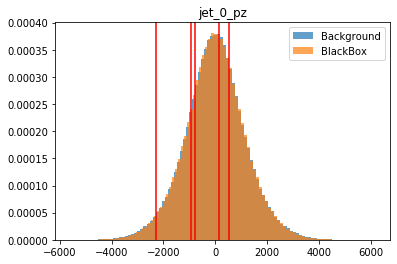

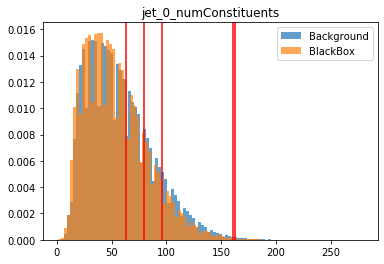

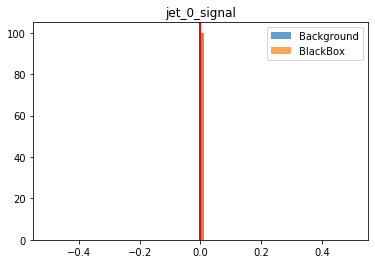

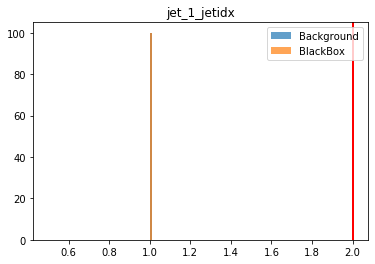

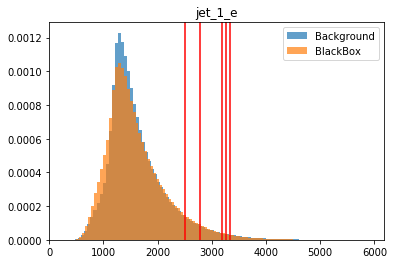

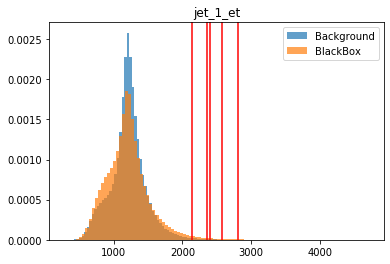

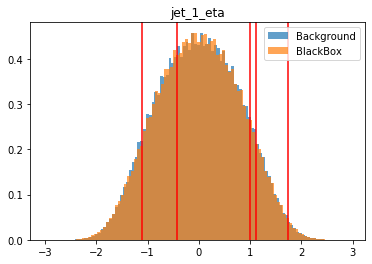

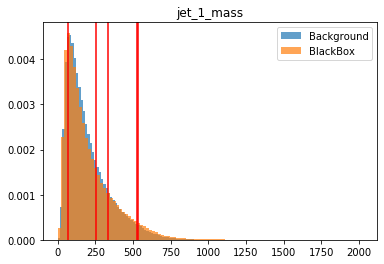

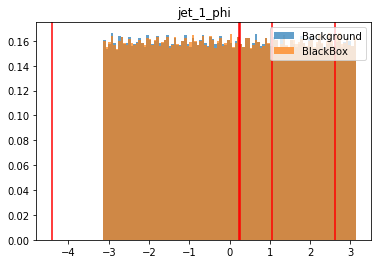

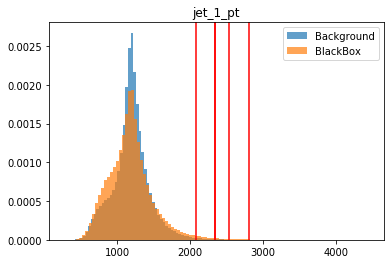

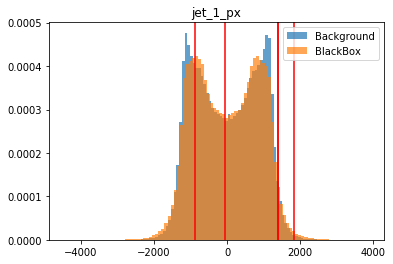

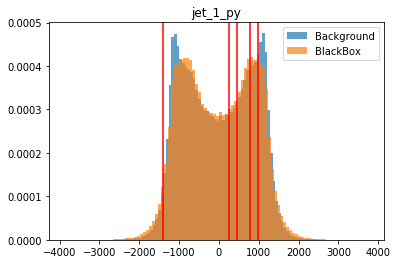

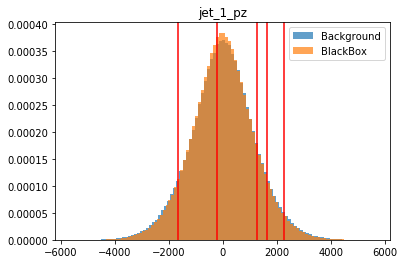

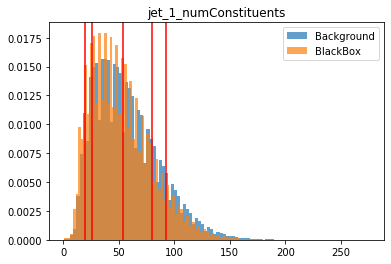

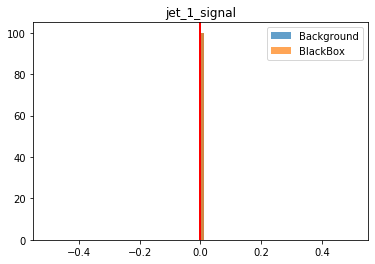

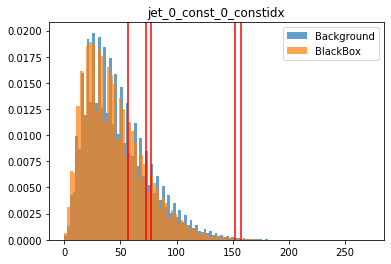

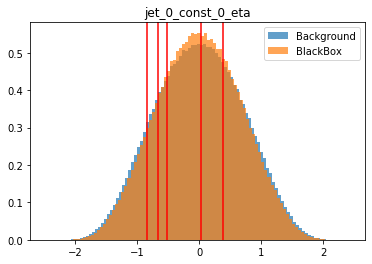

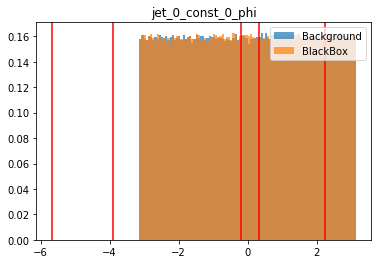

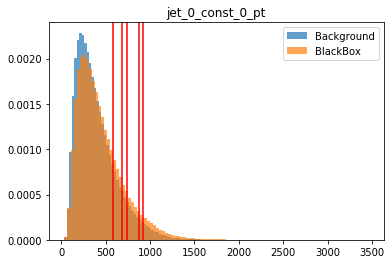

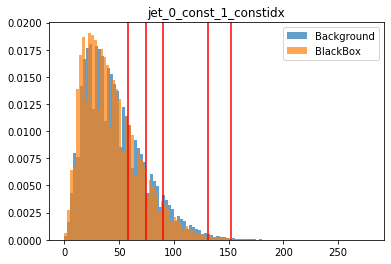

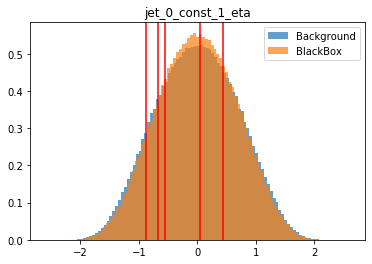

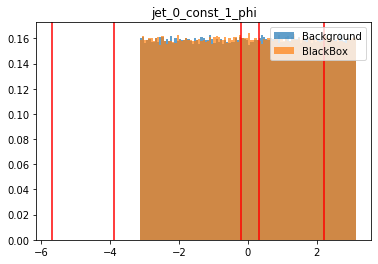

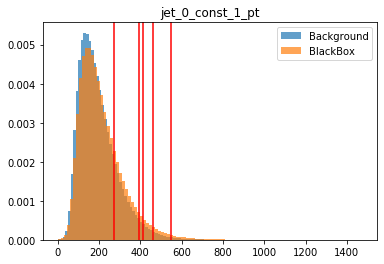

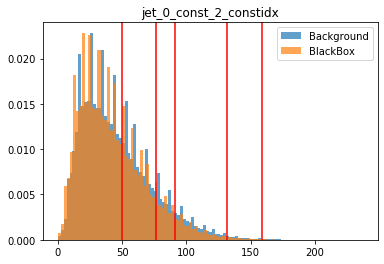

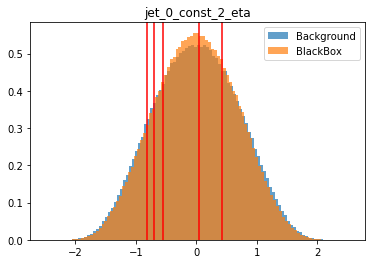

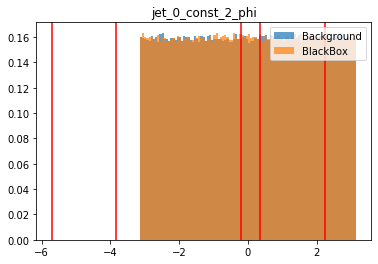

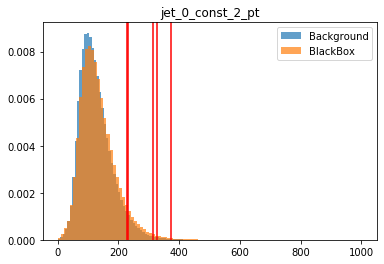

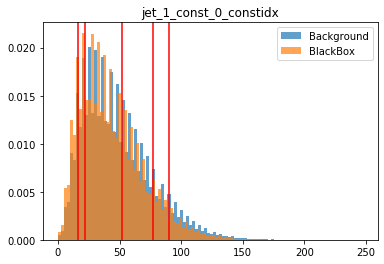

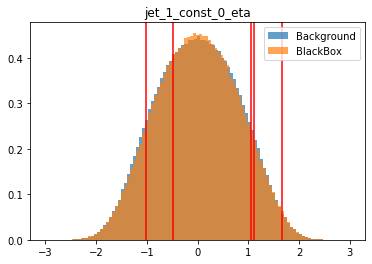

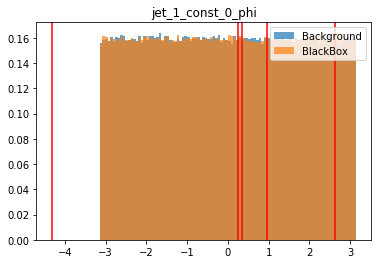

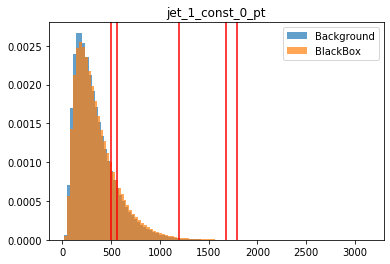

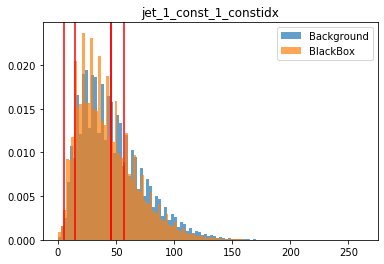

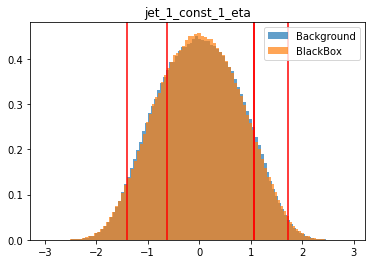

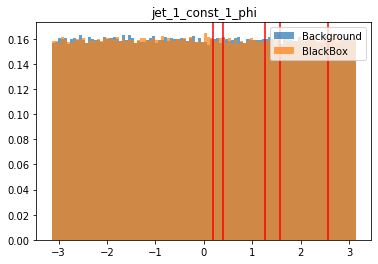

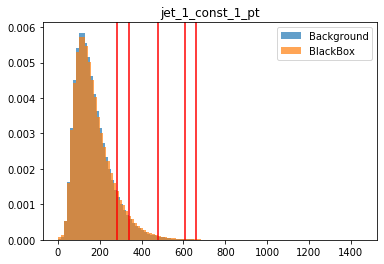

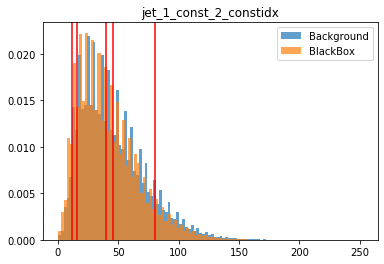

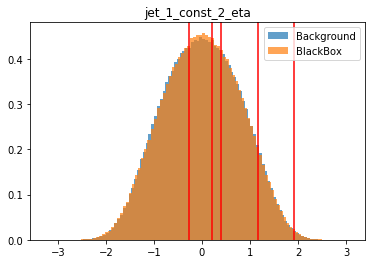

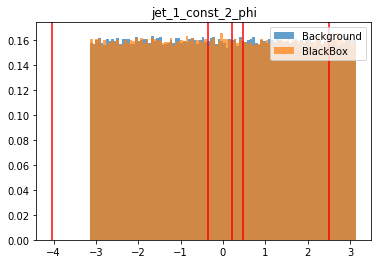

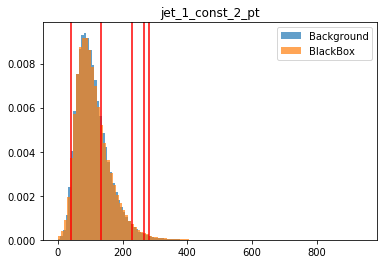

In [92]:
for param in range(background_data_array.shape[1]):
    bb32_lines = blackbox_df[blackbox_df['evtIdx'].isin(jet1r32_indices)][blackbox_df.columns[param+3]].to_numpy()
    bb21_lines = blackbox_df[blackbox_df['evtIdx'].isin(jet1r21_indices)][blackbox_df.columns[param+3]].to_numpy()
    
    
    plt.hist(background_data_array[:, param], alpha=0.7, label='Background', density=True, bins=100)
    plt.hist(blackbox_data_array[:, param], alpha=0.7, label='BlackBox', density=True, bins=100)
    
    for marker in bb32_lines + bb21_lines:
        plt.axvline(x=marker, color='red')
        
    plt.title(f"{background_df.columns[param+3]}")
    plt.legend(loc='upper right')
    plt.show()
    print()